## Final Project Submission

Please fill out: 
* Student name: Abigail Mwende Muthenya
* Student pace: self paced / part time / full time - (Full time)
* Scheduled project review date/time: 28-03-2025
* Instructor name: Mr. Samuel Karu
* Blog post URL:git@github.com:abbie12334/dsc-phase-1-project-v3.git


# Business Understanding

## Introduction

As our company expands into new industries to diversify its portfolio, we are exploring the acquisition and operation of aircraft for both commercial and private enterprises. However, entering the aviation industry comes with inherent risks, including safety concerns, operational costs, maintenance requirements, and regulatory compliance.

To ensure a successful entry into this market, we must identify aircraft that present the lowest risk while still aligning with our business objectives. This project aims to analyze various aircraft models based on key risk factors such as accident history, maintenance demands, fuel efficiency, and overall reliability. 

The insights derived from this analysis will guide the head of the new aviation division in making informed decisions on which aircraft to purchase, minimizing risk while maximizing operational efficiency and profitability.


In [1]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Displaying the Dataset

In [2]:
# Load the dataset
df = pd.read_csv("data/Aviation_Data.csv")

# Display the first 5 rows of the dataset
df.head()

c:\Users\SOOQ ELASER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The above data originates from historical aviation accident records, compiled over several decades. It includes details on accident events such as dates, aircraft makes, fatal injuries, flight purposes, weather conditions, and more. 

## Data Analysis

In [3]:
# Check the shape of the data

df.shape

(90348, 31)

#### The dataset has 90348 raws and 31 columns

In [4]:
#Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### The output of "df.info()" provides key insights into the data including
### The dataset contains 90,348 rows and 31 columns, Missing data observations, Data Types 5 float64 columns and 26 object columns


In [5]:
#check how many countries we have
len(df.Country.unique())

220

#### There are 220 unique countries in the dataset

## Now let's conduct a key summary statistics of numeric columns

In [6]:
# Summary statistics of numeric columns
df.agg(["min","max","mean","count","std"])

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889.0,90348,88889.0,88889.0,88837.0,88663.0,34382.0,34373.0,50249.0,52790.0,...,82697.0,16648.0,77488.000000,76379.000000,76956.000000,82977.000000,84397.0,61724.0,82508.0,73659.0
min,NaN,01-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,NaN,Incident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,349.000000,161.000000,380.000000,699.000000,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# Performing Data Cleaning

In [8]:
# creating a copy of the original dataset to clean
df_clean = df.copy() 

In [9]:
# Check for duplicate
df_clean.duplicated().sum()

1390

In [10]:
 # remove duplicates
df_clean.drop_duplicates(inplace=True)

# asserting that the duplicated values are dropped

df_clean.duplicated().sum()

0

In [11]:
# Check missing values

df_clean.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                    121
Country                     295
Latitude                  54576
Longitude                 54585
Airport.Code              38709
Airport.Name              36168
Injury.Severity            1069
Aircraft.damage            3263
Aircraft.Category         56671
Registration.Number        1386
Make                        132
Model                       161
Amateur.Built               171
Number.of.Engines          6153
Engine.Type                7146
FAR.Description           56935
Schedule                  76376
Purpose.of.flight          6261
Air.carrier               72310
Total.Fatal.Injuries      11470
Total.Serious.Injuries    12579
Total.Minor.Injuries      12002
Total.Uninjured            5981
Weather.Condition          4561
Broad.phase.of.flight     27234
Report.Status              6450
Publication.Date          15299
dtype: i

In [12]:
# Dealing with missing values
# Step 1: Drop columns with more than 70% missing values
# threshold is a cutoff value that helps decide when to drop a column based on missing value
threshold = 0.7 * len(df_clean)  # 70% of total rows
df_clean = df_clean.dropna(thresh=threshold, axis=1)

# Step 2: Fill numeric columns with median
num_cols = df_clean.select_dtypes(include=['number']).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Step 3: Fill categorical columns with "Unknown"
cat_cols = df_clean.select_dtypes(include=['object']).columns
df_clean[cat_cols] = df_clean[cat_cols].fillna("Unknown")

# Step 4: Drop rows where critical fields are missing
df_clean = df_clean.dropna(subset=['Event.Id', 'Accident.Number', 'Event.Date'])

# Check missing values after processing
print(df_clean.isna().sum())

# Save the cleaned dataset
df_clean.to_csv("Aviation_Data_Cleaned.csv", index=False)

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Publication.Date          0
dtype: int64


# Data Visualization

### First lets check for the columns in the clean dataset(df_clean)

In [13]:
df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

First visualization is Accidents over time

In [14]:

# extract the year from Event.Date and assign it to a new column Year
# Convert Event.Date to datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'], errors='coerce')

# Now extract the year
df_clean['Year'] = df_clean['Event.Date'].dt.year


In [15]:
# Count the number of accidents per year

accidents_per_year = df_clean.groupby('Year')['Event.Id'].count()

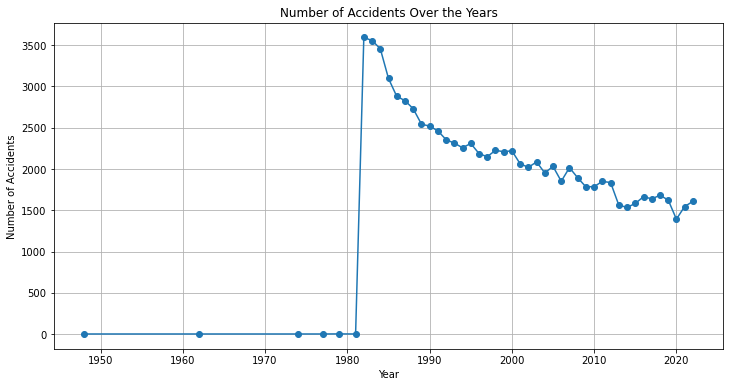

In [16]:

# First, group by Year and count the number of accidents
accidents_per_year = df_clean.groupby('Year').size()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o')
plt.title('Number of Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


second visualization is Fatal injuries by Aircraft Make(top 5)

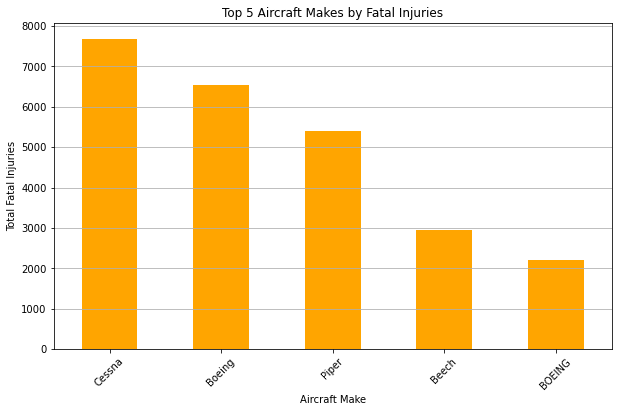

In [17]:

# Group by Aircraft Make and sum fatal injuries
fatal_injuries = df_clean.groupby('Make')['Total.Fatal.Injuries'].sum()

# Get top 5 aircraft makes
top5_fatal = fatal_injuries.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10,6))
top5_fatal.plot(kind='bar', color='orange')
plt.title('Top 5 Aircraft Makes by Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Third visualization is a flight purpose distribution

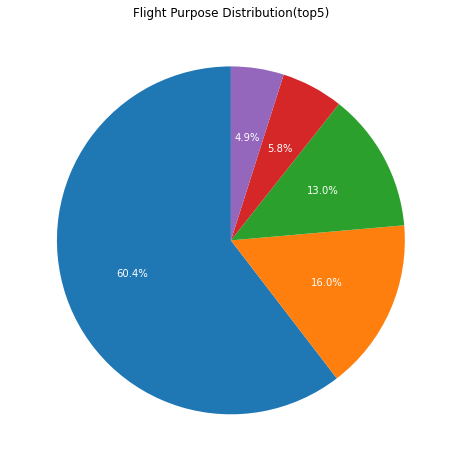

In [18]:
# Count the top 5 flight purposes

top5_purposes = df_clean['Purpose.of.flight'].value_counts().head(5)

# Plotting

plt.figure(figsize=(8,8))
plt.pie(top5_purposes,
        labels=top5_purposes.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'white'})
plt.title('Flight Purpose Distribution(top5)')

plt.show()

These charts serve to visually represent the trends and key factors influencing aviation accident risk and contribute to a deeper understanding of the underlying data. 